In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import scipy
from scipy.stats.stats import pearsonr
import pandas.util.testing as tm
from scipy.stats import spearmanr
import statsmodels.api as sm

C:\Users\Kiran\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [3]:
df = pd.read_csv("19states_covid-19 cases (1).csv", index_col = 0)
df.head()

,Total_confirmed,0-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,Total Male_confirmed,...,Hispanic_confirmed,Asian_confirmed,American indian and Alaska native_confirmed,Total population_Male,Total population_Female,Hispanic,White,Black or African American,American Indian and Alaska Native,Asian
State,,,,,,,,,,,,,,,,,,,,,
California,329162,31015,74003,64870,53279,47498,29954,15033,13113,164635,...,1563,12648,458,19673553,19883492,15261300,23535388,2283850,302792,5821585
Colorado,37686,3369,7409,6621,6169,5608,3769,2321,2382,17882,...,13657,738,183,2864761,2830803,1200900,4790677,237578,55146,180277
Connecticut,47287,2112,5807,6707,6655,7956,6589,4434,6971,20453,...,8973,684,45,1740533,1832132,576400,2688136,391552,9507,165855
Illinois,153916,12431,26577,25311,26633,25346,17643,9805,10114,72590,...,48999,4317,0,6266062,6475018,2173800,9135145,1793079,35846,717938
Maryland,74260,6401,11590,13905,12952,11467,8130,5119,4686,35620,...,19701,1446,0,2930350,3112368,613900,3305047,1810885,13433,378985


In [5]:
df = df[['Total_confirmed', 'Total Male_confirmed', 'Total Female_confirmed']]
df

,Total_confirmed,Total Male_confirmed,Total Female_confirmed
State,,,
California,329162,164635,162718
Colorado,37686,17882,18692
Connecticut,47287,20453,25838
Illinois,153916,72590,78554
Maryland,74260,35620,38640
Massachusetts,105629,49245,60821
Michigan,69388,6674,7153
Minnesota,42281,20629,21453
Mississippi,35419,14734,20472


# EDA

In [6]:
df.describe()

,Total_confirmed,Total Male_confirmed,Total Female_confirmed
count,19.000000,19.000000,19.000000
mean,74423.210526,34239.368421,36523.684211
std,75362.739431,38206.076956,38237.241251
min,12438.000000,5987.000000,6423.000000
25%,36180.500000,13816.500000,16229.500000
50%,47287.000000,20453.000000,21453.000000
75%,71824.000000,34553.000000,36097.500000
max,329162.000000,164635.000000,162718.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, California to Wisconsin
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Total_confirmed         19 non-null     int64
 1   Total Male_confirmed    19 non-null     int64
 2   Total Female_confirmed  19 non-null     int64
dtypes: int64(3)
memory usage: 608.0+ bytes


In [8]:
df.columns

Index(['Total_confirmed', 'Total Male_confirmed', 'Total Female_confirmed'], dtype='object')

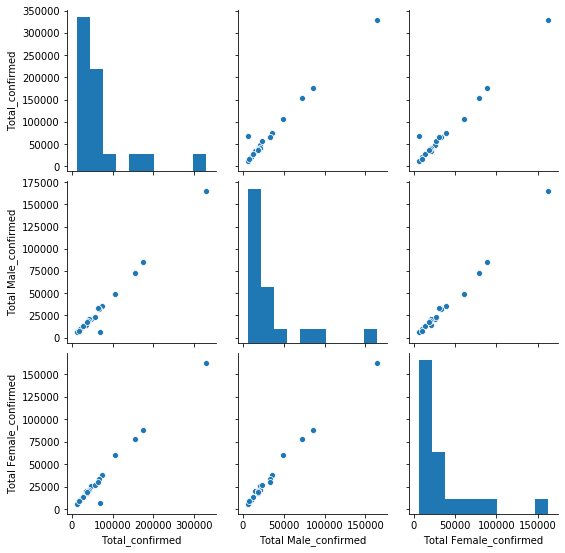

In [9]:
sns.pairplot(df)

In [10]:
df_corr = df.corr()
df_corr

,Total_confirmed,Total Male_confirmed,Total Female_confirmed
Total_confirmed,1.000000,0.986446,0.983883
Total Male_confirmed,0.986446,1.000000,0.996372
Total Female_confirmed,0.983883,0.996372,1.000000


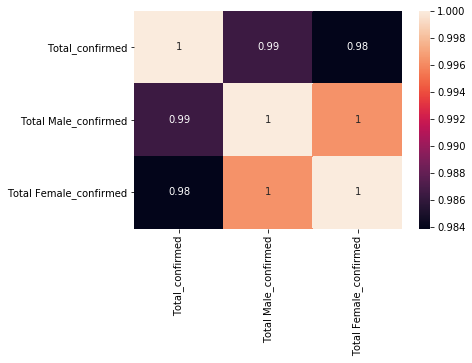

In [11]:
sns.heatmap(df_corr, annot=True)

In [12]:
spearmanr(df['Total_confirmed'], df['Total Male_confirmed'])

SpearmanrResult(correlation=0.8578947368421052, pvalue=2.6477931032626356e-06)

In [13]:
spearmanr(df['Total_confirmed'], df['Total Female_confirmed'])

SpearmanrResult(correlation=0.8508771929824561, pvalue=3.889959117183733e-06)

# OLS - Ordinary Least Squares Method

In [15]:
Y = df['Total_confirmed']
X = df['Total Male_confirmed']
X = sm.add_constant(X)
model = sm.OLS(df['Total_confirmed'],df['Total Male_confirmed'])
results = model.fit()
results.params
results.summary()

C:\Users\Kiran\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Total_confirmed   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              1087.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):                    1.50e-17
Time:                        17:42:28   Log-Likelihood:                         -207.42
No. Observations:                  19   AIC:                                      416.8
Df Residuals:                      18   BIC:                                      417.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Total Male_confirmed     2.0503      0.062     32.977      0.000       1.920       2.181
==============================================================================
Omnibus:                       43.263   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.149
Skew:                           3.474   Prob(JB):                     8.24e-32
Kurtosis:                      14.512   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
Y = df['Total_confirmed']
X = df['Total Female_confirmed']
X = sm.add_constant(X)
model = sm.OLS(df['Total_confirmed'],df['Total Female_confirmed'])
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Total_confirmed   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              1082.
Date:                Mon, 20 Jul 2020   Prob (F-statistic):                    1.57e-17
Time:                        17:42:51   Log-Likelihood:                         -207.47
No. Observations:                  19   AIC:                                      416.9
Df Residuals:                      18   BIC:                                      417.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Total Female_confirmed     1.9875      0.060     32.898      0.000       1.861       2.114
==============================================================================
Omnibus:                       41.509   Durbin-Watson:                   2.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.859
Skew:                           3.311   Prob(JB):                     3.84e-29
Kurtosis:                      14.020   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression Model for population_Male

In [51]:
df=df.astype({'Total Male_confirmed': 'int32', 'Total Male_confirmed': 'int32'})

(array([11.,  4.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([  5987. ,  21851.8,  37716.6,  53581.4,  69446.2,  85311. ,
        101175.8, 117040.6, 132905.4, 148770.2, 164635. ]),
 <a list of 10 Patch objects>)

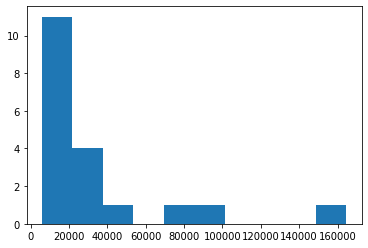

In [52]:
 plt.hist(x = df["Total Male_confirmed"])

(array([9., 6., 1., 0., 1., 1., 0., 0., 0., 1.]),
 array([ 12438. ,  44110.4,  75782.8, 107455.2, 139127.6, 170800. ,
        202472.4, 234144.8, 265817.2, 297489.6, 329162. ]),
 <a list of 10 Patch objects>)

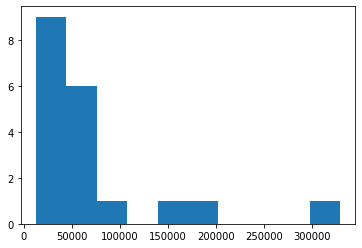

In [53]:
 plt.hist(x = df['Total_confirmed'])

In [54]:
x = df[['Total Male_confirmed']]
y = df[['Total_confirmed']]


In [55]:
x.columns

Index(['Total Male_confirmed'], dtype='object')

In [56]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)


[[164635.]
 [ 17882.]
 [ 20453.]
 [ 72590.]
 [ 35620.]
 [ 49245.]
 [  6674.]
 [ 20629.]
 [ 14734.]
 [ 10073.]
 [ 12899.]
 [ 85388.]
 [ 32721.]
 [  5987.]
 [  7694.]
 [ 23221.]
 [ 33486.]
 [ 18702.]
 [ 17915.]]


In [57]:
y_arr = np.array(y).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
y_scaler = standardscaler.fit_transform(y_arr)
# print(y_scaler)

y_scaledback = standardscaler.inverse_transform(y_scaler)
print(y_scaledback)

[[329162.]
 [ 37686.]
 [ 47287.]
 [153916.]
 [ 74260.]
 [105629.]
 [ 69388.]
 [ 42281.]
 [ 35419.]
 [ 21172.]
 [ 27683.]
 [175298.]
 [ 66853.]
 [ 12438.]
 [ 17487.]
 [ 56648.]
 [ 65274.]
 [ 39218.]
 [ 36942.]]


# Train Test and Split the data

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Creating and Training the Model

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()

In [62]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Print out the coefficients of the model

In [63]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[1.0444941]]


# Predicting Test Data

In [64]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'y_test')

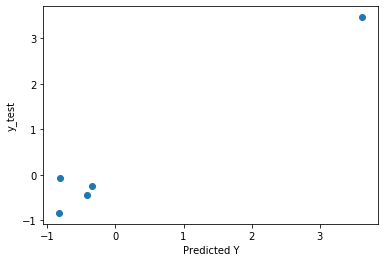

In [65]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating the Model

In [66]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.20717508491718348
MSE: 0.11644759490459378
RMSE: 0.3412441866238805


# Residuals

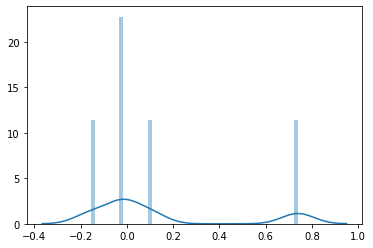

In [67]:
sns.distplot((y_test-predictions),bins=51);

In [68]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
Total Male_confirmed,1.044494


# Linear Regression Model for population_Female

In [69]:
 df=df.astype({'Total Female_confirmed': 'int32', 'Total Female_confirmed': 'int32'})

(array([10.,  4.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([  6423. ,  22052.5,  37682. ,  53311.5,  68941. ,  84570.5,
        100200. , 115829.5, 131459. , 147088.5, 162718. ]),
 <a list of 10 Patch objects>)

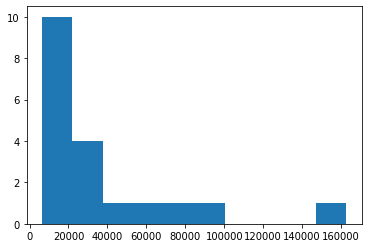

In [70]:
 plt.hist(x = df["Total Female_confirmed"])

(array([9., 6., 1., 0., 1., 1., 0., 0., 0., 1.]),
 array([ 12438. ,  44110.4,  75782.8, 107455.2, 139127.6, 170800. ,
        202472.4, 234144.8, 265817.2, 297489.6, 329162. ]),
 <a list of 10 Patch objects>)

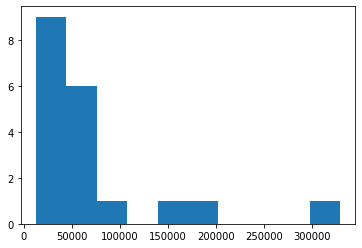

In [71]:
plt.hist(x = df["Total_confirmed"])

In [72]:
x = df[['Total Female_confirmed']]
y = df[['Total_confirmed']]


In [73]:
x.columns

Index(['Total Female_confirmed'], dtype='object')

In [74]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[162718.]
 [ 18692.]
 [ 25838.]
 [ 78554.]
 [ 38640.]
 [ 60821.]
 [  7153.]
 [ 21453.]
 [ 20472.]
 [ 10225.]
 [ 13767.]
 [ 88627.]
 [ 33555.]
 [  6423.]
 [  9618.]
 [ 27362.]
 [ 30763.]
 [ 20328.]
 [ 18941.]]


In [75]:
y_arr = np.array(y).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
y_scaler = standardscaler.fit_transform(y_arr)
# print(y_scaler)

y_scaledback = standardscaler.inverse_transform(y_scaler)
print(y_scaledback)

[[329162.]
 [ 37686.]
 [ 47287.]
 [153916.]
 [ 74260.]
 [105629.]
 [ 69388.]
 [ 42281.]
 [ 35419.]
 [ 21172.]
 [ 27683.]
 [175298.]
 [ 66853.]
 [ 12438.]
 [ 17487.]
 [ 56648.]
 [ 65274.]
 [ 39218.]
 [ 36942.]]


# Train Test and Split the data

In [76]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Creating and Training the Model

In [77]:
lm = LinearRegression()

In [78]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[1.01938131]]


# Predicting Test Data

In [80]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'y_test')

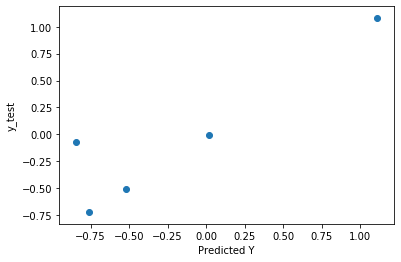

In [81]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating The Model

In [82]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.17388335314785458
MSE: 0.12115992895922703
RMSE: 0.3480803484243646


# Residuals

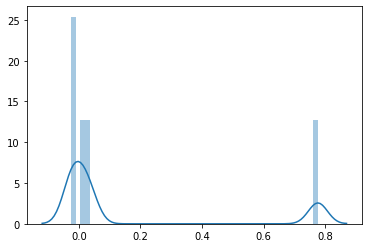

In [83]:
sns.distplot((y_test-predictions),bins=51);

In [50]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
Total Female_confirmed,0.977535
